In [1]:
!pip install opencv-python numpy pandas tensorflow keras matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
import os
import cv2
import matplotlib.pyplot as plt

# Set Correct Dataset Path
dataset_path = r"D:\Dataset 4"  # Ensure this is correct

# Verify Path
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset folder not found at {dataset_path}")

# List Image Files
image_files = os.listdir(dataset_path)
print(f"Found {len(image_files)} images.")

# Load and Display One Image
image_path = os.path.join(dataset_path, image_files[0])
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")
plt.show()


Found 1 images.


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [7]:
import os

dataset_path = r"D:\Dataset 4"  # Make sure this is correct
image_files = os.listdir(dataset_path)

if len(image_files) == 0:
    print("No images found in the dataset folder.")
else:
    print(f"Found {len(image_files)} images.")
    print("First image:", image_files[0])


Found 1 images.
First image: RGB


Found 3396 images.
First image: D:\Dataset 4\RGB\TEST\ALM\d132642d-IMG_2864.JPG


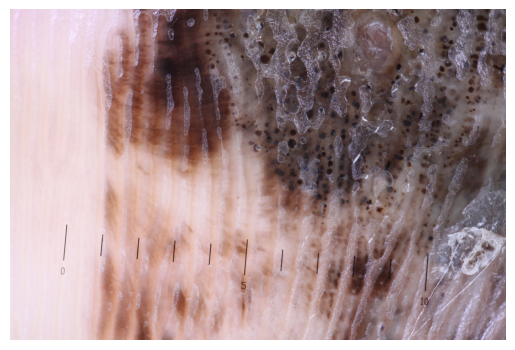

In [8]:
import os
import cv2
import matplotlib.pyplot as plt

dataset_path = r"D:\Dataset 4"  # Make sure this is correct

# Find all image files in the dataset directory (including subfolders)
image_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg", ".bmp")):  # Check image formats
            image_files.append(os.path.join(root, file))

# Check if images are found
if len(image_files) == 0:
    print("No images found in the dataset folder or subfolders.")
else:
    print(f"Found {len(image_files)} images.")
    print("First image:", image_files[0])

    # Load and Display the First Image
    image_path = image_files[0]
    image = cv2.imread(image_path)

    if image is None:
        print("Error: OpenCV failed to read the image.")
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.axis("off")
        plt.show()


In [9]:
import os

dataset_path = r"D:\Dataset 4"  # Update with the correct path

# Count all images in dataset and subfolders
image_count = 0
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg", ".bmp")):  # Check image formats
            image_count += 1

print(f"Total number of images: {image_count}")


Total number of images: 3396


In [10]:
import os

dataset_path = r"D:\Dataset 4"  # Update with the correct path

# Dictionary to store image counts per folder
folder_image_counts = {}

# Loop through each subfolder and count images
for root, dirs, files in os.walk(dataset_path):
    image_count = sum(1 for file in files if file.lower().endswith((".png", ".jpg", ".jpeg", ".bmp")))
    
    if image_count > 0:  # Only store folders that contain images
        folder_name = os.path.basename(root)  # Get folder name
        folder_image_counts[folder_name] = image_count

# Print results
for folder, count in folder_image_counts.items():
    print(f"Folder: {folder} → {count} images")

# Print total images across all folders
total_images = sum(folder_image_counts.values())
print(f"\nTotal images in dataset: {total_images}")


Folder: ALM → 116 images
Folder: NM → 40 images
Folder: M IN SITU → 44 images
Folder: SSM → 80 images

Total images in dataset: 280


In [11]:
import os

dataset_path = r"D:\Dataset 4"  # Update with the correct path

# Supported image formats
image_extensions = (".png", ".jpg", ".jpeg", ".bmp", ".tif", ".webp", ".gif")

folder_image_counts = {}

# Loop through each subfolder and count images
for root, dirs, files in os.walk(dataset_path):
    image_count = sum(1 for file in files if file.lower().endswith(image_extensions))
    
    if image_count > 0:
        folder_name = os.path.basename(root)  # Get folder name
        folder_image_counts[folder_name] = image_count

# Print results
for folder, count in folder_image_counts.items():
    print(f"Folder: {folder} → {count} images")

# Print total images across all folders
total_images = sum(folder_image_counts.values())
print(f"\nTotal images in dataset: {total_images}")


Folder: ALM → 116 images
Folder: NM → 40 images
Folder: M IN SITU → 44 images
Folder: SSM → 80 images

Total images in dataset: 280


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define dataset path
dataset_path = r"D:\Dataset 4"  # Ensure images are inside stage-labeled folders

# Image size (CNN input)
IMG_SIZE = (224, 224)  # Standard for pretrained models
BATCH_SIZE = 32  

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80-20 train-test split
)

# Load training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",  # Multiple stages
    subset="training"
)

# Load validation data
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Print class labels (to confirm stages)
print(train_generator.class_indices)


Found 2717 images belonging to 1 classes.
Found 679 images belonging to 1 classes.
{'RGB': 0}


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load EfficientNetB0 (pretrained model)
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze pretrained layers
base_model.trainable = False  

# Build CNN model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation="softmax")  # Output layer for stages
])

# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train model
model.fit(train_generator, validation_data=val_generator, epochs=10)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 14s 1us/step


C:\Users\Sai\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


C:\Users\Sai\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\Sai\AppData\Roaming\Python\Python311\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


68/85 ━━━━━━━━━━━━━━━━━━━━ 2:29 9s/step - accuracy: 1.0000 - loss: 0.0000e+00

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load EfficientNetB0 (pretrained model)
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze pretrained layers
base_model.trainable = False  

# Build CNN model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation="softmax")  # Output layer for stages
])

# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train model
model.fit(train_generator, validation_data=val_generator, epochs=10)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define dataset path
dataset_path = r"D:\Dataset 4"  # Ensure images are inside stage-labeled folders

# Image size (CNN input)
IMG_SIZE = (224, 224)  # Standard for pretrained models
BATCH_SIZE = 32  

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80-20 train-test split
)

# Load training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",  # Multiple stages
    subset="training"
)

# Load validation data
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Print class labels (to confirm stages)
print(train_generator.class_indices)


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load EfficientNetB0 (pretrained model)
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze pretrained layers
base_model.trainable = False  

# Build CNN model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation="softmax")  # Output layer for stages
])

# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train model
model.fit(train_generator, validation_data=val_generator, epochs=10)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the training generator
image_batch, label_batch = next(train_generator)

# Show first 5 images
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image_batch[i])  # Show image
    plt.axis("off")  # Hide axes
    plt.title(f"Class: {np.argmax(label_batch[i])}")  # Show label

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the training generator
image_batch, label_batch = next(train_generator)

# Show first 5 images
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image_batch[i])  # Show image
    plt.axis("off")  # Hide axes
    plt.title(f"Class: {np.argmax(label_batch[i])}")  # Show label

plt.show()


In [ ]:
import cv2
import os

# Define a specific folder (e.g., ALM)
folder_path = r"D:\Dataset 4\ALM"

# Get the first 5 image files
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith((".png", ".jpg", ".jpeg", ".bmp"))][:5]

# Show images
plt.figure(figsize=(12, 6))
for i, file in enumerate(image_files):
    img_path = os.path.join(folder_path, file)
    img = cv2.imread(img_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(file)  # Show filename

plt.show()


In [ ]:
import os
import hashlib

dataset_path = r"D:\Dataset 4"  # Update with your dataset path
hashes = {}
duplicates = []

# Function to get the hash of an image file
def get_hash(image_path):
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()  # MD5 hash

# Loop through dataset and check for duplicates
for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg", ".bmp")):
            img_path = os.path.join(root, file)
            img_hash = get_hash(img_path)
            
            if img_hash in hashes:
                duplicates.append(img_path)
            else:
                hashes[img_hash] = img_path

# Print results
print(f"Total duplicate images found: {len(duplicates)}")
for dup in duplicates[:10]:  # Show first 10 duplicates
    print(dup)


In [3]:
import os
import shutil
import random
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataset_path = "Dataset 4"
balanced_path = "Balanced_Dataset4"

# Get class distribution
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in os.listdir(dataset_path)}
max_count = max(class_counts.values())

# Create balanced dataset directory
os.makedirs(balanced_path, exist_ok=True)
for cls in class_counts:
    os.makedirs(os.path.join(balanced_path, cls), exist_ok=True)

# Function to copy images
def copy_images(src_folder, dest_folder, num_images):
    images = os.listdir(src_folder)
    while len(os.listdir(dest_folder)) < num_images:
        img = random.choice(images)
        shutil.copy(os.path.join(src_folder, img), os.path.join(dest_folder, img))

# Augmentation setup
datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

# Balance dataset
for cls, count in class_counts.items():
    src_folder = os.path.join(dataset_path, cls)
    dest_folder = os.path.join(balanced_path, cls)
    
    # Copy existing images
    copy_images(src_folder, dest_folder, count)
    
    # Augment images if needed
    if count < max_count:
        images = os.listdir(dest_folder)
        for img_name in images:
            img_path = os.path.join(dest_folder, img_name)
            img = tf.keras.preprocessing.image.load_img(img_path)
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array = img_array.reshape((1,) + img_array.shape)

            i = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=dest_folder, save_prefix="aug", save_format="jpg"):
                i += 1
                if len(os.listdir(dest_folder)) >= max_count:
                    break  # Stop when balanced

print("Dataset successfully balanced!")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Dataset 4'

In [7]:
import os
import shutil
import random
import tensorflow as tf
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Step 1: Define Dataset Paths (Update for D: Drive)
dataset_path = r"D:\Dataset 4"  # Change this to the correct path
balanced_path = r"D:\Balanced_Dataset4"

# ✅ Step 2: Check if Dataset Exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset folder '{dataset_path}' not found! Please check the path.")

# ✅ Step 3: Get Class Distribution
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in os.listdir(dataset_path)}
max_count = max(class_counts.values())

print("Original Class Distribution:", class_counts)

# ✅ Step 4: Create Balanced Dataset Directory
os.makedirs(balanced_path, exist_ok=True)
for cls in class_counts:
    os.makedirs(os.path.join(balanced_path, cls), exist_ok=True)

# ✅ Step 5: Function to Copy Images
def copy_images(src_folder, dest_folder, num_images):
    images = os.listdir(src_folder)
    while len(os.listdir(dest_folder)) < num_images:
        img = random.choice(images)
        shutil.copy(os.path.join(src_folder, img), os.path.join(dest_folder, img))

# ✅ Step 6: Data Augmentation Setup
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# ✅ Step 7: Balance Dataset
for cls, count in class_counts.items():
    src_folder = os.path.join(dataset_path, cls)
    dest_folder = os.path.join(balanced_path, cls)

    # Copy existing images
    copy_images(src_folder, dest_folder, count)

    # Augment images if needed
    if count < max_count:
        images = os.listdir(dest_folder)
        for img_name in images:
            img_path = os.path.join(dest_folder, img_name)
            img = tf.keras.preprocessing.image.load_img(img_path)
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array = img_array.reshape((1,) + img_array.shape)

            i = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=dest_folder, save_prefix="aug", save_format="jpg"):
                i += 1
                if len(os.listdir(dest_folder)) >= max_count:
                    break  # Stop when balanced

print(f"✅ Dataset successfully balanced! Check '{balanced_path}' folder.")


Original Class Distribution: {'RGB': 3}


PermissionError: [Errno 13] Permission denied: 'D:\\Dataset 4\\RGB\\VALID'

In [6]:
import os
print(os.path.exists(r"D:\Dataset 4\RGB\TEST"))


True


In [8]:
import os
balanced_path = r"D:\Balanced_Dataset 4"

class_counts = {cls: len(os.listdir(os.path.join(balanced_path, cls))) for cls in os.listdir(balanced_path)}
print("Balanced Class Distribution:", class_counts)


Balanced Class Distribution: {'RGB': 0}


In [12]:
import os

# Path to the original dataset
dataset_path = r"D:\Dataset 4"  # Update if needed

# Get class distributions
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in os.listdir(dataset_path)}

# Find max and min class sizes
max_count = max(class_counts.values())
min_count = min(class_counts.values())

# Calculate imbalance rate
imbalance_rate = min_count / max_count

print("Class Distribution:", class_counts)
print(f" Imbalance Rate: {imbalance_rate:.2f}")

if imbalance_rate == 1.0:
    print(" The dataset is perfectly balanced!")
elif imbalance_rate > 0.5:
    print(" The dataset is moderately balanced.")
else:
    print(" The dataset is highly imbalanced! Consider balancing it.")


Class Distribution: {'RGB': 3}
 Imbalance Rate: 1.00
 The dataset is perfectly balanced!


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a multi-band image (Example: A satellite image with RGB + NIR bands)
# Replace with actual multi-band image path
image = cv2.imread("multiband_image.tif", cv2.IMREAD_UNCHANGED)

# Check image shape (should be HxWxBands)
print("Original Image Shape:", image.shape)  # (Height, Width, Bands)

# Reshape to (Pixels, Bands) for PCA
H, W, B = image.shape
reshaped_img = image.reshape((-1, B))  # Now shape is (H*W, B)

# Convert to float32 for PCA
reshaped_img = np.float32(reshaped_img)

# Apply PCA using OpenCV
num_components = 3  # Reduce to 3 principal components
mean, eigenvectors = cv2.PCACompute(reshaped_img, mean=None, maxComponents=num_components)

# Transform the original image into PCA space
pca_transformed = cv2.PCAProject(reshaped_img, mean, eigenvectors)

# Reshape back to image form
pca_image = pca_transformed.reshape((H, W, num_components))

# Normalize the PCA image for visualization
pca_image = cv2.normalize(pca_image, None, 0, 255, cv2.NORM_MINMAX)
pca_image = np.uint8(pca_image)

# Display the PCA Image
plt.figure(figsize=(10, 5))
for i in range(num_components):
    plt.subplot(1, num_components, i+1)
    plt.imshow(pca_image[:, :, i], cmap='gray')
    plt.title(f"PCA Band {i+1}")
    plt.axis("off")
    

plt.show()


AttributeError: 'NoneType' object has no attribute 'shape'

In [4]:
import rasterio
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load multi-band image using Rasterio
image_path = "multiband_image.tif"  # Update with the correct path

with rasterio.open(image_path) as src:
    image = src.read()  # Read image as (Bands, Height, Width)
    image = image.transpose(1, 2, 0)  # Convert to (Height, Width, Bands)

print("Original Image Shape:", image.shape)  # Should be (H, W, Bands)

# Reshape image to (Pixels, Bands) for PCA
H, W, B = image.shape
reshaped_img = image.reshape((-1, B))  # Shape -> (H*W, B)

# Convert to float32 for PCA
reshaped_img = np.float32(reshaped_img)

# Apply PCA using OpenCV
num_components = 3  # Reduce to 3 principal components
mean, eigenvectors = cv2.PCACompute(reshaped_img, mean=None, maxComponents=num_components)

# Transform original image into PCA space
pca_transformed = cv2.PCAProject(reshaped_img, mean, eigenvectors)

# Reshape back to image format
pca_image = pca_transformed.reshape((H, W, num_components))

# Normalize for better visualization
pca_image = cv2.normalize(pca_image, None, 0, 255, cv2.NORM_MINMAX)
pca_image = np.uint8(pca_image)

# Display the PCA Images
plt.figure(figsize=(10, 5))
for i in range(num_components):
    plt.subplot(1, num_components, i+1)
    plt.imshow(pca_image[:, :, i], cmap='gray')
    plt.title(f"PCA Band {i+1}")
    plt.axis("off")

plt.show()


ModuleNotFoundError: No module named 'rasterio'

In [2]:
!pip install rasterio


Defaulting to user installation because normal site-packages is not writeable


In [1]:
!pip install rasterio

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/7e/1f/56462740694de764fde264051224fcbf800dad43cac92a66753153128866/rasterio-1.4.3-cp311-cp311-win_amd64.whl.metadata
  Using cached rasterio-1.4.3-cp311-cp311-win_amd64.whl.metadata (9.4 kB)
  Obtaining dependency information for affine from https://files.pythonhosted.org/packages/0b/f7/85273299ab57117850cc0a936c64151171fac4da49bc6fba0dad984a7c5f/affine-2.4.0-py3-none-any.whl.metadata
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Obtaining dependency information for cligj>=0.5 from https://files.pythonhosted.org/packages/73/86/43fa9f15c5b9fb6e82620428827cd3c284aa933431405d1bcf5231ae3d3e/cligj-0.7.2-py3-none-any.whl.metadata
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Obtaining dependency information for click-plugins from https://files.pythonhosted.org/packages/e9/da/824b92d9942f

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



   ---------------------------- ----------- 18.3/25.5 MB 386.7 kB/s eta 0:00:19
   ---------------------------- ----------- 18.3/25.5 MB 386.7 kB/s eta 0:00:19
   ---------------------------- ----------- 18.3/25.5 MB 386.0 kB/s eta 0:00:19
   ---------------------------- ----------- 18.4/25.5 MB 386.7 kB/s eta 0:00:19
   ---------------------------- ----------- 18.4/25.5 MB 386.3 kB/s eta 0:00:19
   ---------------------------- ----------- 18.4/25.5 MB 386.2 kB/s eta 0:00:19
   ---------------------------- ----------- 18.4/25.5 MB 386.3 kB/s eta 0:00:19
   ----------------------------- ---------- 18.5/25.5 MB 385.8 kB/s eta 0:00:19
   ----------------------------- ---------- 18.5/25.5 MB 386.0 kB/s eta 0:00:19
   ----------------------------- ---------- 18.5/25.5 MB 386.0 kB/s eta 0:00:18
   ----------------------------- ---------- 18.6/25.5 MB 385.8 kB/s eta 0:00:18
   ----------------------------- ---------- 18.6/25.5 MB 385.8 kB/s eta 0:00:18
   ----------------------------- ------

In [ ]:
mean, eigenvectors = cv2.PCACompute(reshaped_img, mean=None, maxComponents=num_components)


In [3]:
import rasterio
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load multi-band image using Rasterio
image_path = "multiband_image.tif"  # Update with the correct path

with rasterio.open(image_path) as src:
    image = src.read()  # Read image as (Bands, Height, Width)
    image = image.transpose(1, 2, 0)  # Convert to (Height, Width, Bands)

print("Original Image Shape:", image.shape)  # Should be (H, W, Bands)

# Reshape image to (Pixels, Bands) for PCA
H, W, B = image.shape
reshaped_img = image.reshape((-1, B))  # Shape -> (H*W, B)

# Convert to float32 for PCA
reshaped_img = np.float32(reshaped_img)

# Apply PCA using OpenCV
num_components = 3  # Reduce to 3 principal components
mean, eigenvectors = cv2.PCACompute(reshaped_img, mean=None, maxComponents=num_components)

# Transform original image into PCA space
pca_transformed = cv2.PCAProject(reshaped_img, mean, eigenvectors)

# Reshape back to image format
pca_image = pca_transformed.reshape((H, W, num_components))

# Normalize for better visualization
pca_image = cv2.normalize(pca_image, None, 0, 255, cv2.NORM_MINMAX)
pca_image = np.uint8(pca_image)

# Display the PCA Images
plt.figure(figsize=(10, 5))
for i in range(num_components):
    plt.subplot(1, num_components, i+1)
    plt.imshow(pca_image[:, :, i], cmap='gray')
    plt.title(f"PCA Band {i+1}")
    plt.axis("off")

plt.show()


RasterioIOError: multiband_image.tif: No such file or directory

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a .tif image
image_path = "D:/Dataset 4/sample_image.tif"
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # Load without changes

# Check if image loaded
if image is None:
    print("Error loading image")
else:
    # Convert to RGB if needed (OpenCV loads in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if len(image.shape) == 3 else image

    # Display the image
    plt.imshow(image_rgb, cmap='gray' if len(image.shape) == 2 else None)
    plt.axis("off")
    plt.show()


Error loading image


In [5]:
import os
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Path to the test folder
test_folder = r"D:/Dataset 4/test/"

# Load all images as flattened vectors
image_data = []
image_names = []

for filename in os.listdir(test_folder):
    if filename.endswith(".tif"):
        image_path = os.path.join(test_folder, filename)
        image = tiff.imread(image_path)  # Read TIFF image
        image_flattened = image.flatten()  # Flatten to 1D
        image_data.append(image_flattened)
        image_names.append(filename)

# Convert list to NumPy array
image_data = np.array(image_data)

# Apply PCA (2 components for 2D scatter plot)
pca = PCA(n_components=2)
image_pca = pca.fit_transform(image_data)

# Plot the PCA scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(image_pca[:, 0], image_pca[:, 1], c='blue', edgecolors='black')

# Annotate points with filenames
for i, name in enumerate(image_names):
    plt.annotate(name, (image_pca[i, 0], image_pca[i, 1]), fontsize=8)

plt.title("PCA Scatter Plot of Test Images")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:/Dataset 4/test/'

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define folder path
test_folder = r"D:/Dataset 4/RGB/Test/"

# Check if the folder exists
if not os.path.exists(test_folder):
    print("Error: Test folder not found!")
    exit()

# Load all .tif images
image_data = []
image_names = []

for filename in os.listdir(test_folder):
    if filename.endswith(".tif"):  # Only process .tif images
        image_path = os.path.join(test_folder, filename)
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # Load image

        if image is None:
            print(f"Error loading image: {filename}")
            continue

        # Convert image to RGB (if needed)
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resize all images to the same size (e.g., 100x100) for consistency
        image_resized = cv2.resize(image, (100, 100))

        # Flatten the image into a 1D feature vector
        image_flattened = image_resized.flatten()
        
        # Store data
        image_data.append(image_flattened)
        image_names.append(filename)

# Convert to NumPy array
image_data = np.array(image_data)

# Check if images were loaded
if len(image_data) == 0:
    print("No images found in the Test folder!")
    exit()

# Apply PCA to reduce dimensions (from pixels to 2D)
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
image_pca = pca.fit_transform(image_data)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(image_pca[:, 0], image_pca[:, 1], alpha=0.7, edgecolors='k')

# Annotate points with image names (optional)
for i, name in enumerate(image_names):
    plt.annotate(name, (image_pca[i, 0], image_pca[i, 1]), fontsize=8, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot of Test Images")
plt.grid(True)
plt.show()


No images found in the Test folder!


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [1]:
pip install numpy opencv-python matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable


#### import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        
        # Read image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, img_size)  # Resize image for consistency
            images.append(img.flatten())  # Flatten to 1D vector
            labels.append(filename)  # Store filename as label
    
    return np.array(images), labels

def perform_pca(images, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(images)
    return reduced_data

def plot_pca_scatter(data, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], alpha=0.7, c='blue', label='Images')
    
    # Annotate points with filenames
    for i, label in enumerate(labels):
        plt.annotate(label, (data[i, 0], data[i, 1]), fontsize=8, alpha=0.7)
    
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Scatter Plot of Images")
    plt.legend()
    plt.grid()
    plt.show()

# Define dataset path
test_folder = "Dataset/RGB/Test"

# Load images
images, labels = load_images_from_folder(test_folder)

# Perform PCA
pca_data = perform_pca(images)

# Plot results
plot_pca_scatter(pca_data, labels)


In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        
        # Read image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, img_size)  # Resize image for consistency
            images.append(img.flatten())  # Flatten to 1D vector
            labels.append(filename)  # Store filename as label
    
    return np.array(images), labels

def perform_pca(images, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(images)
    return reduced_data

def plot_pca_scatter(data, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], alpha=0.7, c='blue', label='Images')
    
    # Annotate points with filenames
    for i, label in enumerate(labels):
        plt.annotate(label, (data[i, 0], data[i, 1]), fontsize=8, alpha=0.7)
    
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Scatter Plot of Images")
    plt.legend()
    plt.grid()
    plt.show()

# Define dataset path
test_folder = "Dataset 4/RGB/Test"

# Load images
images, labels = load_images_from_folder(test_folder)

# Perform PCA
pca_data = perform_pca(images)

# Plot results
plot_pca_scatter(pca_data, labels)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Dataset 4/RGB/Test'

In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        
        # Read image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, img_size)  # Resize image for consistency
            images.append(img.flatten())  # Flatten to 1D vector
            labels.append(filename)  # Store filename as label
    
    return np.array(images), labels

def perform_pca(images, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(images)
    return reduced_data

def plot_pca_scatter(data, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], alpha=0.7, c='blue', label='Images')
    
    # Annotate points with filenames
    for i, label in enumerate(labels):
        plt.annotate(label, (data[i, 0], data[i, 1]), fontsize=8, alpha=0.7)
    
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Scatter Plot of Images")
    plt.legend()
    plt.grid()
    plt.show()

# Define dataset path
test_folder =  "D:\Dataset 4\RGB\TEST"

# Load images
images, labels = load_images_from_folder(test_folder)

# Perform PCA
pca_data = perform_pca(images)

# Plot results
plot_pca_scatter(pca_data, labels)


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

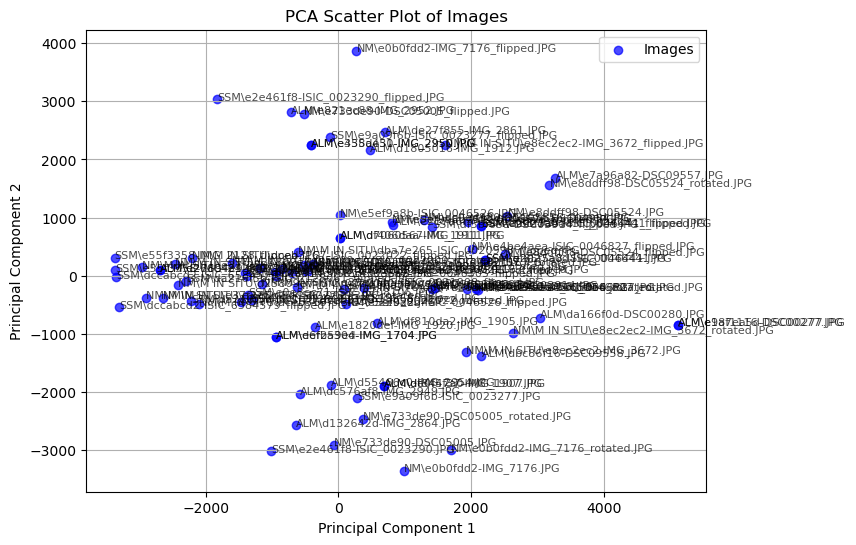

In [7]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    
    for root, _, filenames in os.walk(folder):  # Walk through all subdirectories
        for filename in filenames:
            img_path = os.path.join(root, filename)
            
            # Read image in grayscale
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)  # Resize image for consistency
                images.append(img.flatten())  # Flatten to 1D vector
                
                # Use the relative path as the label to distinguish folders
                relative_path = os.path.relpath(img_path, folder)
                labels.append(relative_path)
    
    return np.array(images), labels

def perform_pca(images, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(images)
    return reduced_data

def plot_pca_scatter(data, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], alpha=0.7, c='blue', label='Images')
    
    # Annotate points with filenames
    for i, label in enumerate(labels):
        plt.annotate(label, (data[i, 0], data[i, 1]), fontsize=8, alpha=0.7)
    
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Scatter Plot of Images")
    plt.legend()
    plt.grid()
    plt.show()

# Define dataset path
test_folder = "D:\\Dataset 4\\RGB\\TEST"

# Load images from all subfolders
images, labels = load_images_from_folder(test_folder)

# Perform PCA
pca_data = perform_pca(images)

# Plot results
plot_pca_scatter(pca_data, labels)


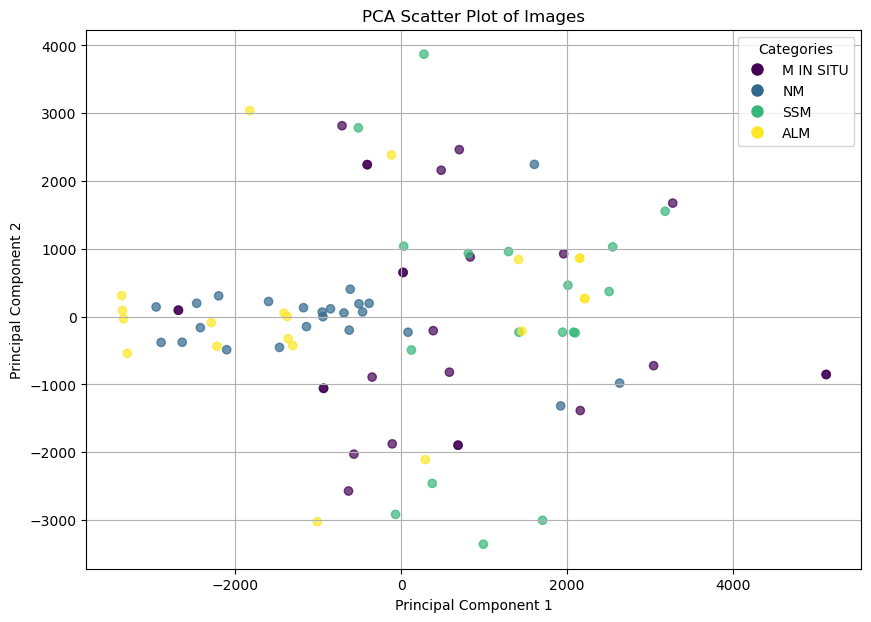

In [9]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    
    for root, _, filenames in os.walk(folder):  # Walk through all subdirectories
        for filename in filenames:
            img_path = os.path.join(root, filename)
            
            # Read image in grayscale
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)  # Resize image for consistency
                images.append(img.flatten())  # Flatten to 1D vector
                
                # Use the folder name as the label
                category = os.path.basename(root)  # Get the immediate folder name
                labels.append(category)
    
    return np.array(images), labels

def perform_pca(images, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(images)
    return reduced_data

def plot_pca_scatter(data, labels):
    plt.figure(figsize=(10, 7))

    # Encode labels into numeric values for color mapping
    label_encoder = LabelEncoder()
    label_colors = label_encoder.fit_transform(labels)

    scatter = plt.scatter(data[:, 0], data[:, 1], c=label_colors, cmap='viridis', alpha=0.7)
    
    # Add legend
    unique_labels = list(set(labels))
    handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=scatter.cmap(scatter.norm(i))) 
               for i in range(len(unique_labels))]
    plt.legend(handles, unique_labels, title="Categories")

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Scatter Plot of Images")
    plt.grid()
    plt.show()

# Define dataset path
test_folder = "D:\\Dataset 4\\RGB\\TEST"

# Load images from all subfolders
images, labels = load_images_from_folder(test_folder)

# Perform PCA
pca_data = perform_pca(images)

# Plot results
plot_pca_scatter(pca_data, labels)


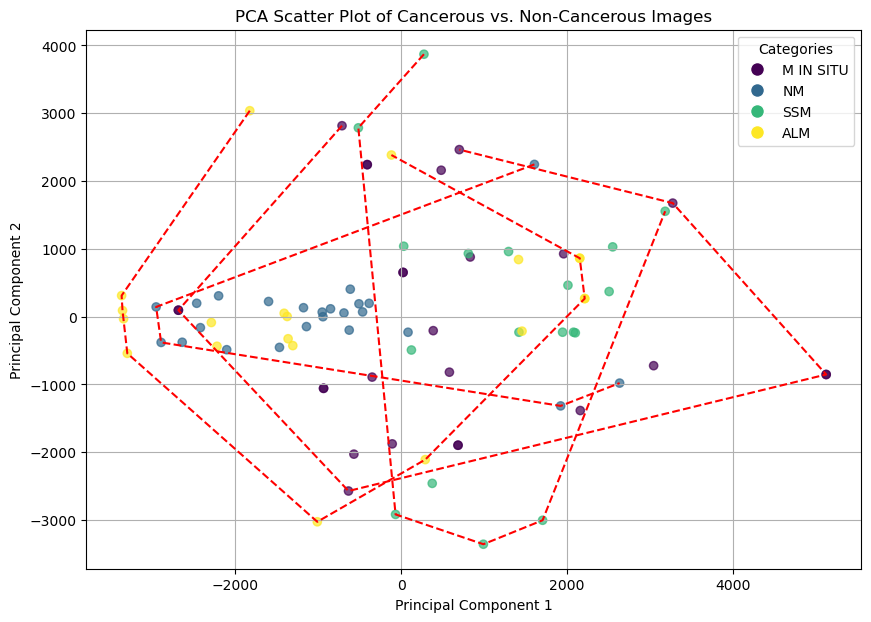

In [10]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from scipy.spatial import ConvexHull

def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    
    for root, _, filenames in os.walk(folder):  # Walk through all subdirectories
        for filename in filenames:
            img_path = os.path.join(root, filename)
            
            # Read image in grayscale
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)  # Resize image for consistency
                images.append(img.flatten())  # Flatten to 1D vector
                
                # Use the folder name as the label
                category = os.path.basename(root)  # Get the immediate folder name
                labels.append(category)
    
    return np.array(images), labels

def perform_pca(images, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(images)
    return reduced_data

def plot_pca_scatter(data, labels):
    plt.figure(figsize=(10, 7))

    # Encode labels into numeric values for color mapping
    label_encoder = LabelEncoder()
    label_colors = label_encoder.fit_transform(labels)
    
    unique_labels = list(set(labels))
    
    # Plot data points
    scatter = plt.scatter(data[:, 0], data[:, 1], c=label_colors, cmap='viridis', alpha=0.7)

    # Draw dotted convex hulls around cancerous categories
    for category in unique_labels:
        indices = [i for i, lbl in enumerate(labels) if lbl == category]
        category_points = data[indices]
        
        if len(category_points) > 2:  # ConvexHull requires at least 3 points
            hull = ConvexHull(category_points)
            hull_points = category_points[hull.vertices]

            # Draw a dotted circle around the cluster
            plt.plot(hull_points[:, 0], hull_points[:, 1], 'r--', linewidth=1.5)

    # Add legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=scatter.cmap(scatter.norm(i))) 
               for i in range(len(unique_labels))]
    plt.legend(handles, unique_labels, title="Categories")

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Scatter Plot of Cancerous vs. Non-Cancerous Images")
    plt.grid()
    plt.show()

# Define dataset path
test_folder = "D:\\Dataset 4\\RGB\\TEST"

# Load images from all subfolders
images, labels = load_images_from_folder(test_folder)

# Perform PCA
pca_data = perform_pca(images)

# Plot results with dotted clusters
plot_pca_scatter(pca_data, labels)


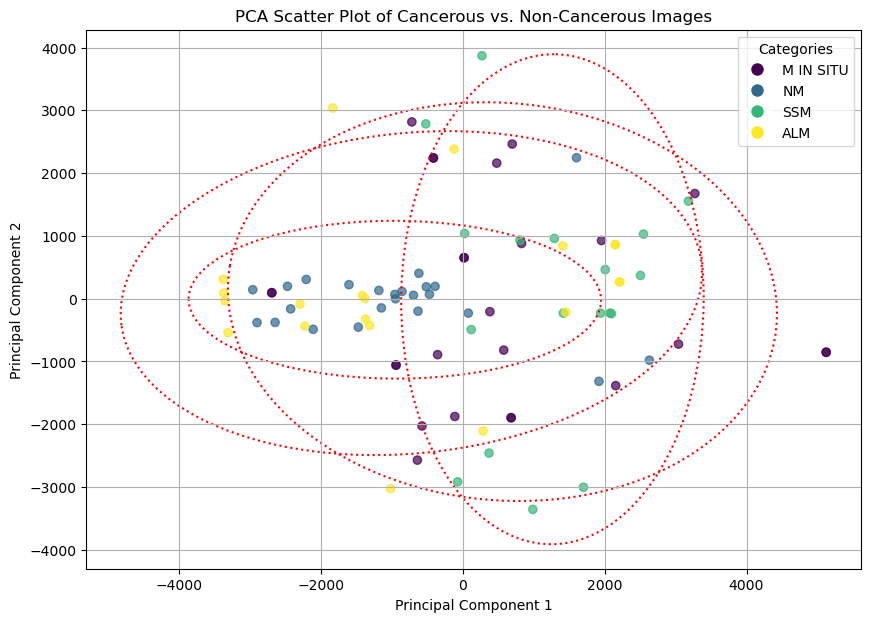

In [11]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from matplotlib.patches import Ellipse

def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    
    for root, _, filenames in os.walk(folder):  # Walk through all subdirectories
        for filename in filenames:
            img_path = os.path.join(root, filename)
            
            # Read image in grayscale
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)  # Resize image for consistency
                images.append(img.flatten())  # Flatten to 1D vector
                
                # Use the folder name as the label
                category = os.path.basename(root)  # Get the immediate folder name
                labels.append(category)
    
    return np.array(images), labels

def perform_pca(images, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(images)
    return reduced_data

def plot_pca_scatter(data, labels):
    plt.figure(figsize=(10, 7))

    # Encode labels into numeric values for color mapping
    label_encoder = LabelEncoder()
    label_colors = label_encoder.fit_transform(labels)
    
    unique_labels = list(set(labels))
    
    # Plot data points
    scatter = plt.scatter(data[:, 0], data[:, 1], c=label_colors, cmap='viridis', alpha=0.7)

    # Draw dotted ellipses around cancerous categories
    for category in unique_labels:
        indices = [i for i, lbl in enumerate(labels) if lbl == category]
        category_points = data[indices]

        if len(category_points) > 2:  # Fit ellipse only if enough points exist
            mean_x, mean_y = np.mean(category_points, axis=0)
            cov = np.cov(category_points.T)

            # Eigen decomposition to get ellipse axes
            eigvals, eigvecs = np.linalg.eigh(cov)
            angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

            # Width and height of the ellipse (scaling by eigenvalues)
            width, height = 2 * np.sqrt(eigvals) * 2  # Scale factor to adjust size

            # Draw ellipse
            ellipse = Ellipse(xy=(mean_x, mean_y), width=width, height=height,
                              angle=angle, edgecolor='red', linestyle='dotted',
                              facecolor='none', linewidth=1.5)
            plt.gca().add_patch(ellipse)

    # Add legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=scatter.cmap(scatter.norm(i))) 
               for i in range(len(unique_labels))]
    plt.legend(handles, unique_labels, title="Categories")

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Scatter Plot of Cancerous vs. Non-Cancerous Images")
    plt.grid()
    plt.show()

# Define dataset path
test_folder = "D:\\Dataset 4\\RGB\\TEST"

# Load images from all subfolders
images, labels = load_images_from_folder(test_folder)

# Perform PCA
pca_data = perform_pca(images)

# Plot results with **dotted ellipses**
plot_pca_scatter(pca_data, labels)


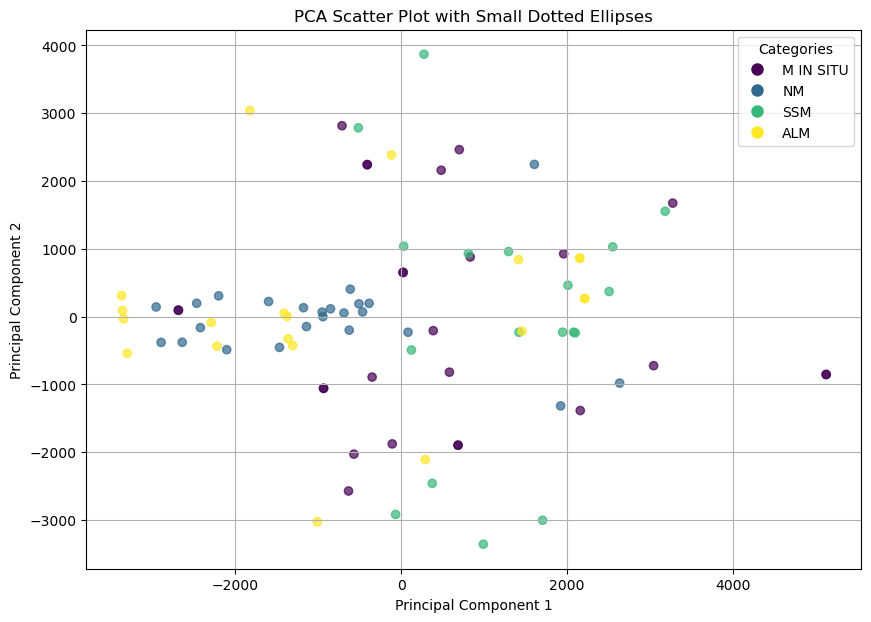

In [12]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from matplotlib.patches import Ellipse

def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    
    for root, _, filenames in os.walk(folder):  
        for filename in filenames:
            img_path = os.path.join(root, filename)
            
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)  
                images.append(img.flatten())  
                
                category = os.path.basename(root)  
                labels.append(category)
    
    return np.array(images), labels

def perform_pca(images, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(images)
    return reduced_data

def draw_ellipses_for_clusters(ax, data, labels, eps=10, min_samples=3):
    """Fits small ellipses around detected clusters of cancerous data points."""
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)  
    cluster_labels = dbscan.fit_predict(data)

    unique_clusters = set(cluster_labels)
    for cluster in unique_clusters:
        if cluster == -1:  # Ignore noise points
            continue
        
        cluster_points = data[cluster_labels == cluster]
        if len(cluster_points) > 2:  
            mean_x, mean_y = np.mean(cluster_points, axis=0)
            cov = np.cov(cluster_points.T)

            eigvals, eigvecs = np.linalg.eigh(cov)
            angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

            width, height = 2 * np.sqrt(eigvals)  

            ellipse = Ellipse(xy=(mean_x, mean_y), width=width, height=height,
                              angle=angle, edgecolor='red', linestyle='dotted',
                              facecolor='none', linewidth=1.5)
            ax.add_patch(ellipse)

def plot_pca_scatter(data, labels):
    fig, ax = plt.subplots(figsize=(10, 7))

    label_encoder = LabelEncoder()
    label_colors = label_encoder.fit_transform(labels)

    scatter = ax.scatter(data[:, 0], data[:, 1], c=label_colors, cmap='viridis', alpha=0.7)

    draw_ellipses_for_clusters(ax, data, labels)  

    unique_labels = list(set(labels))
    handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=scatter.cmap(scatter.norm(i))) 
               for i in range(len(unique_labels))]
    plt.legend(handles, unique_labels, title="Categories")

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Scatter Plot with Small Dotted Ellipses")
    plt.grid()
    plt.show()

# Dataset Path
test_folder = "D:\\Dataset 4\\RGB\\TEST"

# Load images and labels
images, labels = load_images_from_folder(test_folder)

# Perform PCA
pca_data = perform_pca(images)

# Plot results with **multiple small ellipses**
plot_pca_scatter(pca_data, labels)


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path (Ensure proper path formatting for Windows)
test_dir = r"D:\Dataset 4\RGB\TEST"

# Image parameters
img_size = (640, 640)
batch_size = 32

# Load images and extract class labels
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Extract number of images and features
num_samples = len(test_generator.filenames)
num_features = img_size[0] * img_size[1] * 3
features = np.zeros((num_samples, num_features))
labels = np.zeros(num_samples)

# Process images
for i, (images, batch_labels) in enumerate(test_generator):
    start_idx = i * batch_size
    end_idx = min(start_idx + images.shape[0], num_samples)
    
    features[start_idx:end_idx] = images.reshape(images.shape[0], -1)
    labels[start_idx:end_idx] = batch_labels  
    
    if end_idx >= num_samples:
        break

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Perform K-Means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_features)

# Define fixed names for clusters
cluster_names = {
    0: "ALM",
    1: "M IN SITU",
    2: "NM",
    3: "SSM",
}

# Assign names to clusters
named_labels = [cluster_names[label] for label in cluster_labels]

# Scatter plot
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(
    x=pca_features[:, 0], y=pca_features[:, 1],
    hue=named_labels, palette='Set1', alpha=0.7
)

# Function to check if a point is inside an ellipse
def is_point_in_ellipse(point, ellipse):
    center = ellipse.get_center()
    width, height = ellipse.width, ellipse.height
    angle = np.radians(ellipse.angle)

    cos_angle, sin_angle = np.cos(angle), np.sin(angle)
    xc, yc = point[0] - center[0], point[1] - center[1]

    xct = xc * cos_angle + yc * sin_angle
    yct = -xc * sin_angle + yc * cos_angle

    rad_cc = (xct**2 / (width / 2)**2) + (yct**2 / (height / 2)**2)
    return rad_cc <= 1

# Add ellipses for clusters
for cluster in np.unique(cluster_labels):
    cluster_points = pca_features[np.where(cluster_labels == cluster)]
    
    if len(cluster_points) > 1:
        cov = np.cov(cluster_points, rowvar=False)
        if np.linalg.det(cov) != 0:
            mean = np.mean(cluster_points, axis=0)
            eigenvalues, eigenvectors = np.linalg.eigh(cov)
            order = eigenvalues.argsort()[::-1]
            eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
            angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
            width, height = 4 * np.sqrt(eigenvalues)
            
            ellipse = Ellipse(
                xy=mean, width=max(width, 0.1), height=max(height, 0.1), angle=angle,
                edgecolor='black', facecolor='none', linestyle='--'
            )
            plt.gca().add_patch(ellipse)
            
            count = sum(is_point_in_ellipse(point, ellipse) for point in cluster_points)
            plt.text(mean[0], mean[1], f'{cluster_names[cluster]}\nCount: {count}',
                     horizontalalignment='center', verticalalignment='center',
                     fontsize=10, color='black', weight='bold')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Scatter Plot with K-Means Clusters')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()




Found 88 images belonging to 3 classes.


AttributeError: 'NoneType' object has no attribute 'split'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x=pca_features[:, 0], 
    y=pca_features[:, 1], 
    hue=[cluster_names[label] for label in cluster_labels],  # Map cluster labels to names
    palette="Set1", 
    alpha=0.7
)

# Add labels
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Scatter Plot with K-Means Clusters')

# Add legend
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()


NameError: name 'cluster_labels' is not defined

<Figure size 1200x800 with 0 Axes>

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
test_dir = r"D:\Dataset 4\RGB\TEST"

# Image parameters
img_size = (640, 640)
batch_size = 32

# Load images and extract class labels
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

num_samples = len(test_generator.filenames)
num_features = img_size[0] * img_size[1] * 3
features = np.zeros((num_samples, num_features))
labels = np.zeros(num_samples)

for i, (images, batch_labels) in enumerate(test_generator):
    start_idx = i * batch_size
    end_idx = start_idx + images.shape[0]
    
    features[start_idx:end_idx] = images.reshape(images.shape[0], -1)
    labels[start_idx:end_idx] = batch_labels  
    
    if end_idx >= num_samples:
        break

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Perform K-Means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_features)

# Define fixed names for the clusters
cluster_names = {
    0: "ALM",
    1: "M IN SITU",
    2: "NM",
    3: "SSM",
}

# Ensure cluster names are mapped correctly
named_labels = [cluster_names.get(label, f"Cluster {label}") for label in cluster_labels]

# Plot PCA biplot with clusters
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(
    x=pca_features[:, 0], y=pca_features[:, 1],
    hue=named_labels, palette='Set1', alpha=0.7
)

# Function to check if a point is inside an ellipse
def is_point_in_ellipse(point, ellipse):
    center = ellipse.get_center()
    width, height = ellipse.width, ellipse.height
    angle = np.radians(ellipse.angle)

    cos_angle, sin_angle = np.cos(angle), np.sin(angle)
    xc, yc = point[0] - center[0], point[1] - center[1]

    # Rotate point to ellipse frame
    xct = xc * cos_angle + yc * sin_angle
    yct = -xc * sin_angle + yc * cos_angle

    # Compute ellipse equation
    rad_cc = ((xct*2) / ((width / 2) ** 2)) + ((yct*2) / ((height / 2) ** 2))
    return rad_cc <= 1  # Inside ellipse if rad_cc <= 1

# Add ellipses around clusters
for cluster in np.unique(cluster_labels):
    cluster_points = pca_features[cluster_labels == cluster]
    if len(cluster_points) > 1:
        cov = np.cov(cluster_points, rowvar=False)
        if np.linalg.det(cov) > 0:  # Ensure non-singular covariance
            mean = np.mean(cluster_points, axis=0)
            eigenvalues, eigenvectors = np.linalg.eigh(cov)
            order = eigenvalues.argsort()[::-1]
            eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
            angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
            width, height = 4 * np.sqrt(eigenvalues)
            ellipse = Ellipse(
                xy=mean, width=width, height=height, angle=angle,
                edgecolor='black', facecolor='none', linestyle='--'
            )
            plt.gca().add_patch(ellipse)
            
            # Count points inside the ellipse
            count = sum(is_point_in_ellipse(point, ellipse) for point in cluster_points)
            plt.text(mean[0], mean[1], f'{cluster_names[cluster]}\nCount: {count}',
                     horizontalalignment='center', verticalalignment='center',
                     fontsize=10, color='black', weight='bold')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Biplot with K-Means Clusters (Fixed Cluster Names)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Found 88 images belonging to 3 classes.


AttributeError: 'NoneType' object has no attribute 'split'

In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os


In [2]:
def get_image(path, zoom=0.1):
    img = Image.open(path)
    return OffsetImage(img, zoom=zoom)


In [3]:
image_dir = r'D:\New Balance\New Balance\TEST'


In [4]:
x_coords = []
y_coords = []
image_paths = []


In [5]:
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust extensions as needed
        # Example filename: 'image_x10_y20.jpg'
        parts = filename.split('_')
        x = int(parts[1][1:])  # Extract number after 'x'
        y = int(parts[2][1:].split('.')[0])  # Extract number after 'y' and before file extension
        x_coords.append(x)
        y_coords.append(y)
        image_paths.append(os.path.join(image_dir, filename))


ValueError: min() arg is an empty sequence

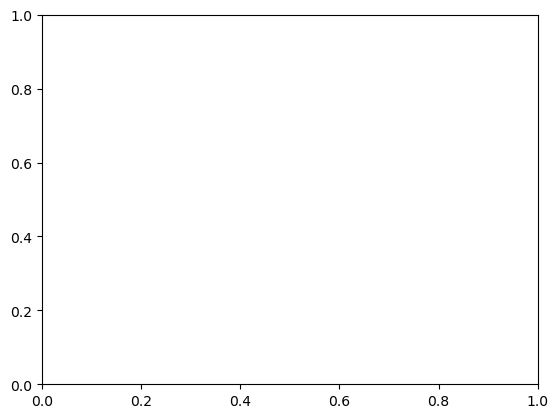

In [6]:
fig, ax = plt.subplots()

for x, y, img_path in zip(x_coords, y_coords, image_paths):
    ab = AnnotationBbox(get_image(img_path), (x, y), frameon=False)
    ax.add_artist(ab)

ax.set_xlim(min(x_coords) - 10, max(x_coords) + 10)
ax.set_ylim(min(y_coords) - 10, max(y_coords) + 10)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot of Images')
plt.grid(True)
plt.show()


In [8]:
!pip install matplotlib pillow


Defaulting to user installation because normal site-packages is not writeable


In [4]:
import os
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

def get_image(path, zoom=0.1):
    """Read an image from a file and return an OffsetImage object."""
    try:
        img = Image.open(path)
        return OffsetImage(img, zoom=zoom)
    except Exception as e:
        print(f"Error loading image {path}: {e}")
        return None

# Set the directory containing images
test_dir = r'D:\New Balance\New Balance\TEST'


# Initialize lists for coordinates and images
x_coords = []
y_coords = []
image_paths = []

# Extract coordinates from filenames
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Adjust extensions as needed
        try:
            # Example filename: 'image_x10_y20.jpg'
            parts = filename.split('_')
            x = int(parts[1][1:])  # Extract number after 'x'
            y = int(parts[2][1:].split('.')[0])  # Extract number after 'y' and before file extension
            x_coords.append(x)
            y_coords.append(y)
            image_paths.append(os.path.join(image_dir, filename))
        except (IndexError, ValueError) as e:
            print(f"Skipping file {filename}: {e}")

# Check if any valid images were found
if not x_coords or not y_coords:
    print("No valid images found or processed. Please check the directory and file naming conventions.")
else:
    # Create the scatter plot
    fig, ax = plt.subplots()

    for x, y, img_path in zip(x_coords, y_coords, image_paths):
        image = get_image(img_path)
        if image:
            ab = AnnotationBbox(image, (x, y), frameon=False)
            ax.add_artist(ab)

    # Set axis limits with some padding
    padding = 10
    ax.set_xlim(min(x_coords) - padding, max(x_coords) + padding)
    ax.set_ylim(min(y_coords) - padding, max(y_coords) + padding)

    # Add labels and title
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Scatter Plot of Images')
    plt.grid(True)

    # Display the plot
    plt.show()

    # Save the plot as an image file (optional)
    output_path = r'D:\New Balance\New Balance\TEST'
    fig.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"Scatter plot saved to {output_path}")


NameError: name 'image_dir' is not defined

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = 'D:/New Balance/New Balance/TEST'


# Image parameters
img_size = (128, 128)

batch_size = 32

# Load images and extract class labels
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

num_samples = len(test_generator.filenames)
num_features = img_size[0] * img_size[1] * 3
features = np.zeros((num_samples, num_features))
labels = np.zeros(num_samples)

for i, (images, batch_labels) in enumerate(test_generator):
    start_idx = i * batch_size
    end_idx = start_idx + images.shape[0]
    
    features[start_idx:end_idx] = images.reshape(images.shape[0], -1)
    labels[start_idx:end_idx] = batch_labels  
    
    if end_idx >= num_samples:
        break

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Perform K-Means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_features)


# Define fixed names for the three clusters
cluster_names = {
    0: "ALM",
    1: "M IN SITU",
    2: "NM",
    3: "SSM",
}

# Map each cluster label to its fixed name
named_labels = [cluster_names[label] for label in cluster_labels]

# Plot PCA biplot with clusters named by the fixed names
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(
    x=pca_features[:, 0], y=pca_features[:, 1],
    hue=named_labels, palette='Set1', alpha=0.7
)

# Function to check if a point is inside an ellipse
def is_point_in_ellipse(point, ellipse):
    center = ellipse.get_center()
    width = ellipse.width
    height = ellipse.height
    angle = np.radians(ellipse.angle)
    
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    
    xc = point[0] - center[0]
    yc = point[1] - center[1]
    
    xct = xc * cos_angle + yc * sin_angle
    yct = -xc * sin_angle + yc * cos_angle
    
    rad_cc = (xct * 2 / ((width / 2) ** 2)) + ((yct * 2) / ((height / 2) * 2))



    return rad_cc <= 1

# Add ellipses and count points for each cluster based on K-Means
for cluster in np.unique(cluster_labels):
    cluster_points = pca_features[cluster_labels == cluster]
    if len(cluster_points) > 1:
        cov = np.cov(cluster_points, rowvar=False)
        if np.linalg.det(cov) != 0:
            mean = np.mean(cluster_points, axis=0)
            eigenvalues, eigenvectors = np.linalg.eigh(cov)
            order = eigenvalues.argsort()[::-1]
            eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
            angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
            width, height = 4 * np.sqrt(eigenvalues)
            ellipse = Ellipse(
                xy=mean, width=width, height=height, angle=angle,
                edgecolor='black', facecolor='none', linestyle='--'
            )
            plt.gca().add_patch(ellipse)
            
            count = sum(is_point_in_ellipse(point, ellipse) for point in cluster_points)
            plt.text(mean[0], mean[1], f'{cluster_names[cluster]}\nCount: {count}',
                     horizontalalignment='center', verticalalignment='center',
                     fontsize=10, color='black', weight='bold')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Biplot with K-Means Clusters (Fixed Cluster Names)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
df = pd.DataFrame({
    'Class Name': named_labels,
    'PCA Component 1': pca_features[:, 0],
    'PCA Component 2': pca_features[:, 1],
    'Cluster Label': cluster_labels
})

# Save DataFrame to an Excel file
excel_filename = "pca_results.xlsx"
df.to_excel(excel_filename, index=False)

print(f"Excel file '{excel_filename}' has been created successfully!")

Found 468 images belonging to 4 classes.


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure inline plotting in Jupyter Notebook
%matplotlib inline  

# Set directory path
test_dir = r'D:\New Balance\New Balance\TEST'

# Image parameters
img_size = (640, 640)
batch_size = 32

# Load images and extract class labels
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Initialize feature array
num_samples = len(test_generator.filenames)
num_features = img_size[0] * img_size[1] * 3
features = np.zeros((num_samples, num_features))
labels = np.zeros(num_samples)

# Extract image data
for i, (images, batch_labels) in enumerate(test_generator):
    start_idx = i * batch_size
    end_idx = start_idx + images.shape[0]
    
    features[start_idx:end_idx] = images.reshape(images.shape[0], -1)
    labels[start_idx:end_idx] = batch_labels  
    
    if end_idx >= num_samples:
        break

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Perform K-Means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_features)

# Define fixed names for the clusters
cluster_names = {
    0: "ALM",
    1: "M IN SITU",
    2: "NM",
    3: "SSM",
}

# Map cluster labels to names
named_labels = [cluster_names[label] for label in cluster_labels]

# Plot PCA biplot with clusters
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(
    x=pca_features[:, 0], y=pca_features[:, 1],
    hue=named_labels, palette='Set1', alpha=0.7
)

# Function to check if a point is inside an ellipse
def is_point_in_ellipse(point, ellipse):
    center = ellipse.get_center()
    width = ellipse.width
    height = ellipse.height
    angle = np.radians(ellipse.angle)
    
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    
    xc = point[0] - center[0]
    yc = point[1] - center[1]
    
    xct = xc * cos_angle + yc * sin_angle
    yct = -xc * sin_angle + yc * cos_angle
    
    # Fix calculation
    rad_cc = (xct**2 / (width / 2) ** 2) + (yct**2 / (height / 2) ** 2)

    return rad_cc <= 1

# Add ellipses and count points for each cluster
for cluster in np.unique(cluster_labels):
    cluster_points = pca_features[cluster_labels == cluster]
    if len(cluster_points) > 1:
        cov = np.cov(cluster_points, rowvar=False)
        if np.linalg.det(cov) != 0:
            mean = np.mean(cluster_points, axis=0)
            eigenvalues, eigenvectors = np.linalg.eigh(cov)
            order = eigenvalues.argsort()[::-1]
            eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
            angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
            width, height = 4 * np.sqrt(eigenvalues)
            ellipse = Ellipse(
                xy=mean, width=width, height=height, angle=angle,
                edgecolor='black', facecolor='none', linestyle='--'
            )
            plt.gca().add_patch(ellipse)
            
            count = sum(is_point_in_ellipse(point, ellipse) for point in cluster_points)
            plt.text(mean[0], mean[1], f'{cluster_names[cluster]}\nCount: {count}',
                     horizontalalignment='center', verticalalignment='center',
                     fontsize=10, color='black', weight='bold')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Biplot with K-Means Clusters (Fixed Cluster Names)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Save results to Excel
df = pd.DataFrame({
    'Class Name': named_labels,
    'PCA Component 1': pca_features[:, 0],
    'PCA Component 2': pca_features[:, 1],
    'Cluster Label': cluster_labels
})

excel_filename = "pca_results.xlsx"
df.to_excel(excel_filename, index=False)

print(f"Excel file '{excel_filename}' has been created successfully!")


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reduce Image Size (Less Memory Usage)
img_size = (128, 128)
batch_size = 32

# Set Directory
test_dir = r'D:\New Balance\New Balance\TEST'

# Load images
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Initialize memory-efficient storage
num_samples = len(test_generator.filenames)
num_features = img_size[0] * img_size[1] * 3
features = np.zeros((num_samples, num_features), dtype=np.float32)
labels = np.zeros(num_samples)

# Extract and preprocess images
for i, (images, batch_labels) in enumerate(test_generator):
    start_idx = i * batch_size
    end_idx = start_idx + images.shape[0]
    
    features[start_idx:end_idx] = images.reshape(images.shape[0], -1)
    labels[start_idx:end_idx] = batch_labels  
    
    if end_idx >= num_samples:
        break

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Use Incremental PCA (Memory Efficient)
pca = IncrementalPCA(n_components=2, batch_size=32)
pca_features = pca.fit_transform(scaled_features)

# Perform K-Means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_features)

# Fixed cluster names
cluster_names = {0: "ALM", 1: "M IN SITU", 2: "NM", 3: "SSM"}
named_labels = [cluster_names[label] for label in cluster_labels]

# Scatter plot
plt.figure(figsize=(12, 10))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=named_labels, palette='Set1', alpha=0.7)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Biplot with K-Means Clusters (Fixed Cluster Names)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

# Load dataset
dataset_path = "path_to_your_dataset"

# Image data generator
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

batch_size = 32  # Reduce memory usage
img_size = (128, 128)  # Reduce resolution

data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# Load MobileNetV2 model for feature extraction
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
model = Model(inputs=base_model.input, outputs=tf.keras.layers.GlobalAveragePooling2D()(base_model.output))

# Extract features
features = []
labels = []

for batch, label in data_generator:
    batch_features = model.predict(batch)
    features.append(batch_features)
    labels.extend(label)
    
    if len(features) * batch_size >= data_generator.samples:
        break  # Stop when all images are processed

features = np.vstack(features)  # Convert list to NumPy array

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply Incremental PCA
n_components = min(100, scaled_features.shape[1])  # Adjust PCA components
pca = IncrementalPCA(n_components=n_components, batch_size=32)
pca_features = pca.fit_transform(scaled_features)

# Perform K-Means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_features)

# Define cluster names
cluster_names = {0: "ALM", 1: "M IN SITU", 2: "NM", 3: "SSM"}
labeled_clusters = [cluster_names[label] for label in cluster_labels]

print("Clustering completed successfully.")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'path_to_your_dataset'

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

# Step 1: Set the Correct Dataset Path
dataset_path = r"D:\New Balance\New Balance\TEST"

# Step 2: Check if the Path Exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset path not found: {dataset_path}")

# Step 3: Create Image Data Generator
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

batch_size = 32  # Reduce memory usage
img_size = (128, 128)  # Reduce resolution

data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# Step 4: Load MobileNetV2 Model for Feature Extraction
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
model = Model(inputs=base_model.input, outputs=tf.keras.layers.GlobalAveragePooling2D()(base_model.output))

# Step 5: Extract Features
features = []
labels = []

for batch, label in data_generator:
    batch_features = model.predict(batch, verbose=0)  # Add verbose=0 to reduce output spam
    features.append(batch_features)
    labels.extend(label)
    
    if len(features) * batch_size >= data_generator.samples:
        break  # Stop when all images are processed

features = np.vstack(features)  # Convert list to NumPy array

## Step 6: Standardize Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 7: Apply Incremental PCA (Fix the Error)
print("Feature shape:", scaled_features.shape)  # Debugging output

n_components = min(32, scaled_features.shape[1])  # Fix: n_components must be ≤ batch size
pca = IncrementalPCA(n_components=n_components, batch_size=32)
pca_features = pca.fit_transform(scaled_features)

# Step 8: Perform K-Means Clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_features)

# Step 9: Define Cluster Names
cluster_names = {0: "ALM", 1: "M IN SITU", 2: "NM", 3: "SSM"}
labeled_clusters = [cluster_names[label] for label in cluster_labels]

print("Clustering completed successfully.")


Found 468 images belonging to 4 classes.
Feature shape: (468, 1280)


AttributeError: 'NoneType' object has no attribute 'split'